In [1]:
import pandas as pd

# Load the Excel file into a DataFrame
df = pd.read_excel('/content/heart_disease (1).xlsx')

print("First 5 rows of the DataFrame:")
# Display the first 5 rows of the DataFrame
print(df.head())

print("\nDataFrame Info:")
# Display a summary of the DataFrame
df.info()

First 5 rows of the DataFrame:
        age                                       Age in years
0    Gender                       Gender ; Male - 1, Female -0
1        cp                                    Chest pain type
2  trestbps                             Resting blood pressure
3      chol                                cholesterol measure
4       fbs  (fasting blood sugar > 120 mg/dl) (1 = true; 0...

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           12 non-null     object
 1   Age in years  12 non-null     object
dtypes: object(2)
memory usage: 324.0+ bytes



The previous attempt to load the Excel file resulted in loading metadata about the columns, not the actual heart disease dataset. To correctly load the dataset, I need to inspect the Excel file for multiple sheets. This will help determine if the data resides on a different sheet or if specific rows need to be skipped on the current sheet.



In [2]:
xls = pd.ExcelFile('/content/heart_disease (1).xlsx')
sheet_names = xls.sheet_names
print("Sheet names in the Excel file:", sheet_names)

Sheet names in the Excel file: ['Description', 'Heart_disease']



The previous inspection revealed that the Excel file contains two sheets: 'Description' and 'Heart_disease'. Since the 'Description' sheet contains metadata, the actual dataset is likely in the 'Heart_disease' sheet. Therefore, I will load the 'Heart_disease' sheet into the DataFrame and then inspect its first few rows and data types to confirm it's the correct data.



In [3]:
import pandas as pd

# Load the 'Heart_disease' sheet from the Excel file into a DataFrame
df = pd.read_excel('/content/heart_disease (1).xlsx', sheet_name='Heart_disease')

print("First 5 rows of the DataFrame from 'Heart_disease' sheet:")
# Display the first 5 rows of the DataFrame
print(df.head())

print("\nDataFrame Info for 'Heart_disease' sheet:")
# Display a summary of the DataFrame
df.info()

First 5 rows of the DataFrame from 'Heart_disease' sheet:
   age   sex               cp  trestbps  chol    fbs         restecg  thalch  \
0   63  Male   typical angina       145   233   True  lv hypertrophy     150   
1   41  Male  atypical angina       135   203  False          normal     132   
2   57  Male     asymptomatic       140   192  False          normal     148   
3   52  Male   typical angina       118   186  False  lv hypertrophy     190   
4   57  Male     asymptomatic       110   201  False          normal     126   

   exang  oldpeak        slope          thal  num  
0  False      2.3  downsloping  fixed defect    0  
1  False      0.0         flat  fixed defect    0  
2  False      0.4         flat  fixed defect    0  
3  False      0.0         flat  fixed defect    0  
4   True      1.5         flat  fixed defect    0  

DataFrame Info for 'Heart_disease' sheet:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 


The first step of EDA is to check for missing values in the DataFrame to understand the completeness of the data. This will identify columns with null entries.



In [4]:
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64



The next step in EDA is to display descriptive statistics for all numerical columns to understand their central tendency, dispersion, and shape of distribution.



In [5]:
print("Descriptive statistics for numerical columns:")
print(df.describe())

Descriptive statistics for numerical columns:
              age    trestbps        chol      thalch     oldpeak         num
count  908.000000  908.000000  908.000000  908.000000  846.000000  908.000000
mean    53.791850  133.430617  201.484581  135.957048    0.891253    1.008811
std      9.158031   20.401608  112.097949   26.804929    1.093875    1.144436
min     29.000000    0.000000    0.000000   60.000000   -2.600000    0.000000
25%     47.750000  120.000000  176.750000  118.000000    0.000000    0.000000
50%     54.000000  130.000000  224.000000  138.000000    0.500000    1.000000
75%     60.000000  144.000000  270.000000  156.000000    1.500000    2.000000
max     77.000000  200.000000  603.000000  202.000000    6.200000    4.000000



Following the instructions, the next step is to display the value counts for each specified categorical column to understand their distribution and identify potential inconsistencies or imbalances in the data.



In [6]:
categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

print("Value counts for categorical columns:")
for col in categorical_columns:
    print(f"\n--- {col} ---")
    print(df[col].value_counts())


Value counts for categorical columns:

--- sex ---
sex
Male      718
Female    190
Name: count, dtype: int64

--- cp ---
cp
asymptomatic       495
non-anginal        203
atypical angina    165
typical angina      45
Name: count, dtype: int64

--- fbs ---
fbs
False    723
True     185
Name: count, dtype: int64

--- restecg ---
restecg
normal              542
lv hypertrophy      187
st-t abnormality    179
Name: count, dtype: int64

--- exang ---
exang
False    516
True     337
TURE      36
FALSE     19
Name: count, dtype: int64

--- slope ---
slope
flat           453
upsloping      298
downsloping    157
Name: count, dtype: int64

--- thal ---
thal
reversable defect    372
normal               339
fixed defect         197
Name: count, dtype: int64



To visualize the distributions of numerical features and identify potential outliers or skewness, I will generate histograms for each numerical column as specified in the instructions. This will provide a visual understanding of the data's spread and central tendency.



Generating histograms for numerical columns...


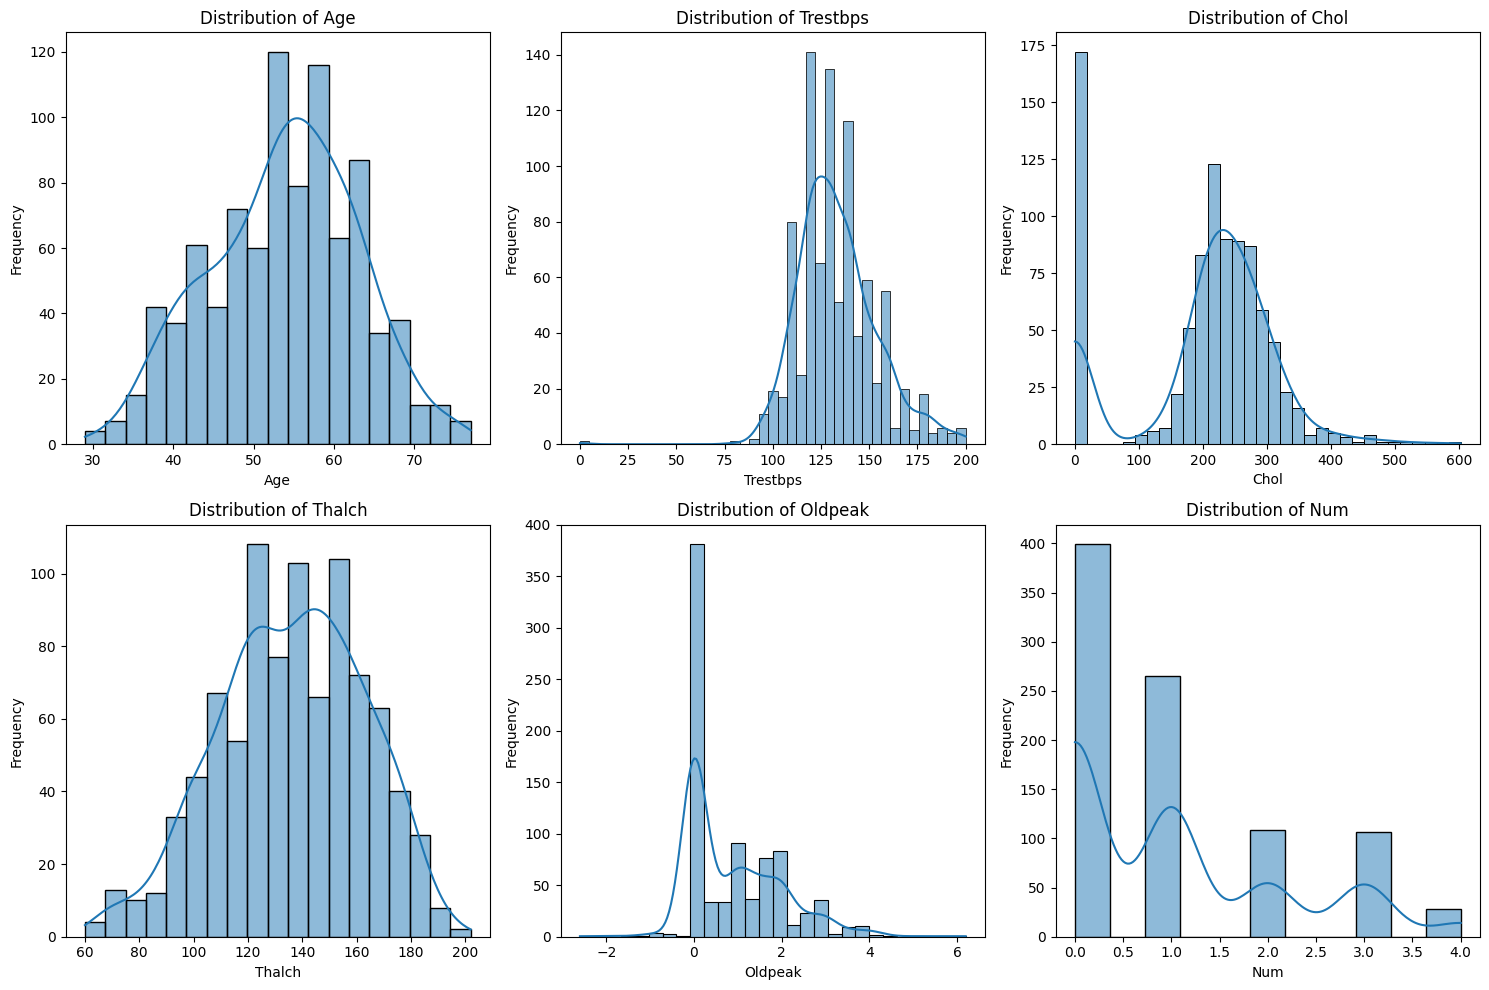

Histograms generated successfully.


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_columns = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'num']

print("Generating histograms for numerical columns...")
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns):
    plt.subplot(2, 3, i + 1) # Arrange plots in 2 rows, 3 columns
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col.replace("_", " ").title()}')
    plt.xlabel(col.replace("_", " ").title())
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()
print("Histograms generated successfully.")


The next step in the EDA is to generate bar plots for all categorical features to visualize the distribution of their categories, as specified in the instructions. This will provide a clear overview of the frequency of each category.



Generating bar plots for categorical columns...


/tmp/ipython-input-970/2466372816.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')
/tmp/ipython-input-970/2466372816.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')
/tmp/ipython-input-970/2466372816.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')
/tmp/ipython-input-970/2466372816.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` 

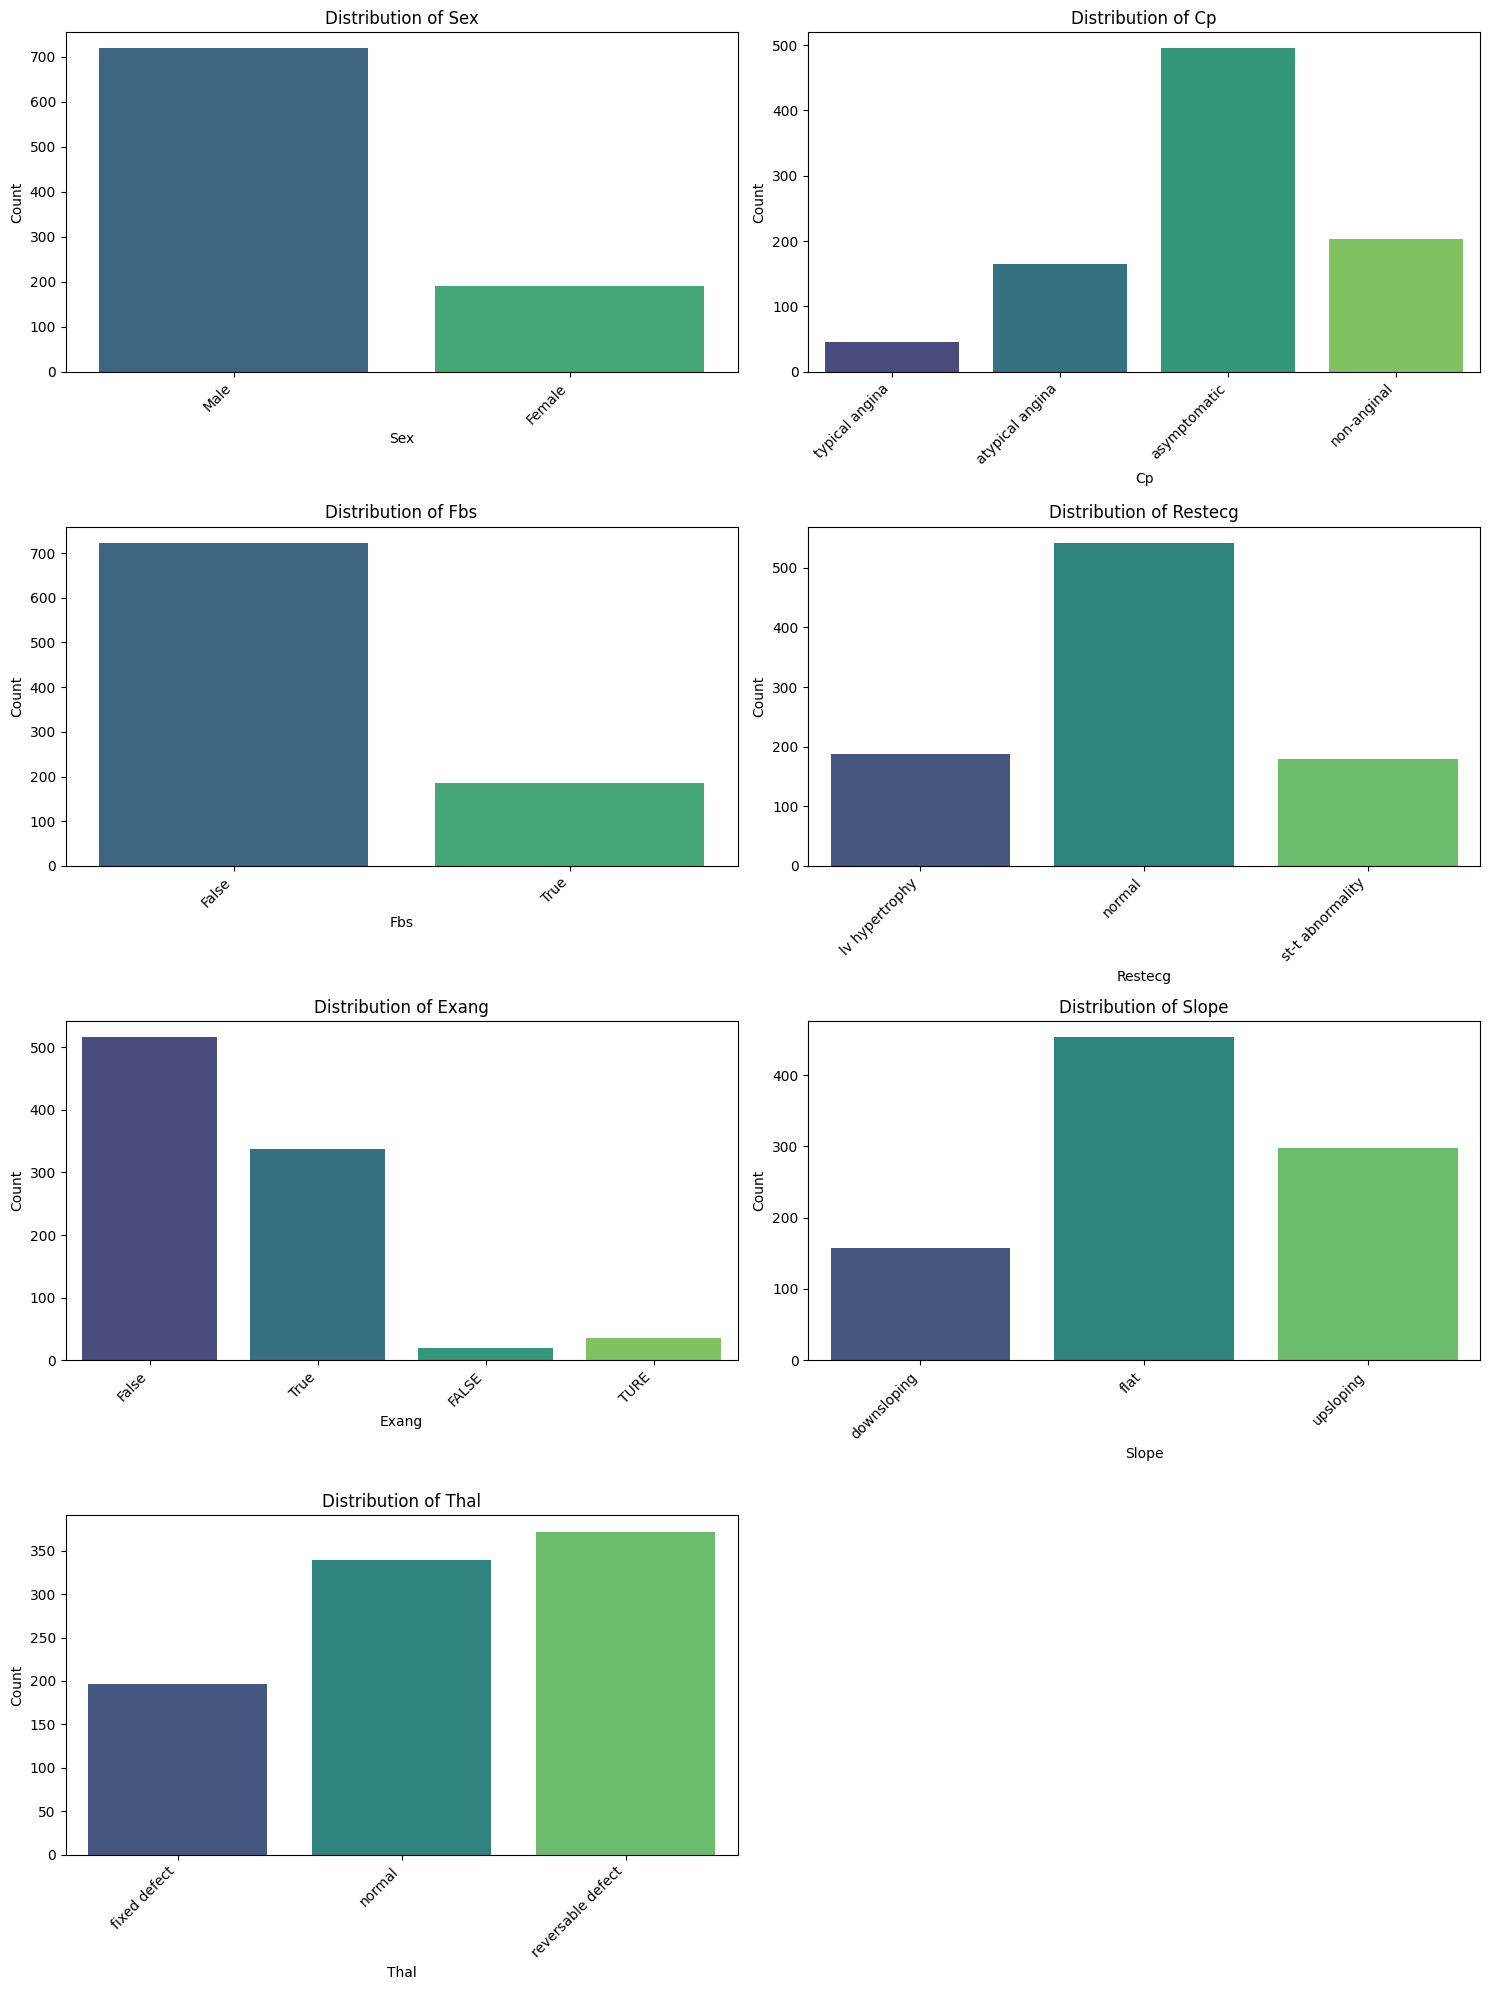

Bar plots generated successfully.


In [8]:
print("Generating bar plots for categorical columns...")
plt.figure(figsize=(15, 20))
for i, col in enumerate(categorical_columns):
    plt.subplot(4, 2, i + 1) # Arrange plots in 4 rows, 2 columns
    sns.countplot(data=df, x=col, palette='viridis')
    plt.title(f'Distribution of {col.replace("_", " ").title()}')
    plt.xlabel(col.replace("_", " ").title())
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()
print("Bar plots generated successfully.")


The previous step generated bar plots with a `FutureWarning` which should be addressed by explicitly setting `hue=col` and `legend=False` in `sns.countplot`. Additionally, the next step in the EDA, as per the instructions, is to compute the correlation matrix for the numerical features and visualize it using a heatmap with annotations and a title.



Generating bar plots for categorical columns...


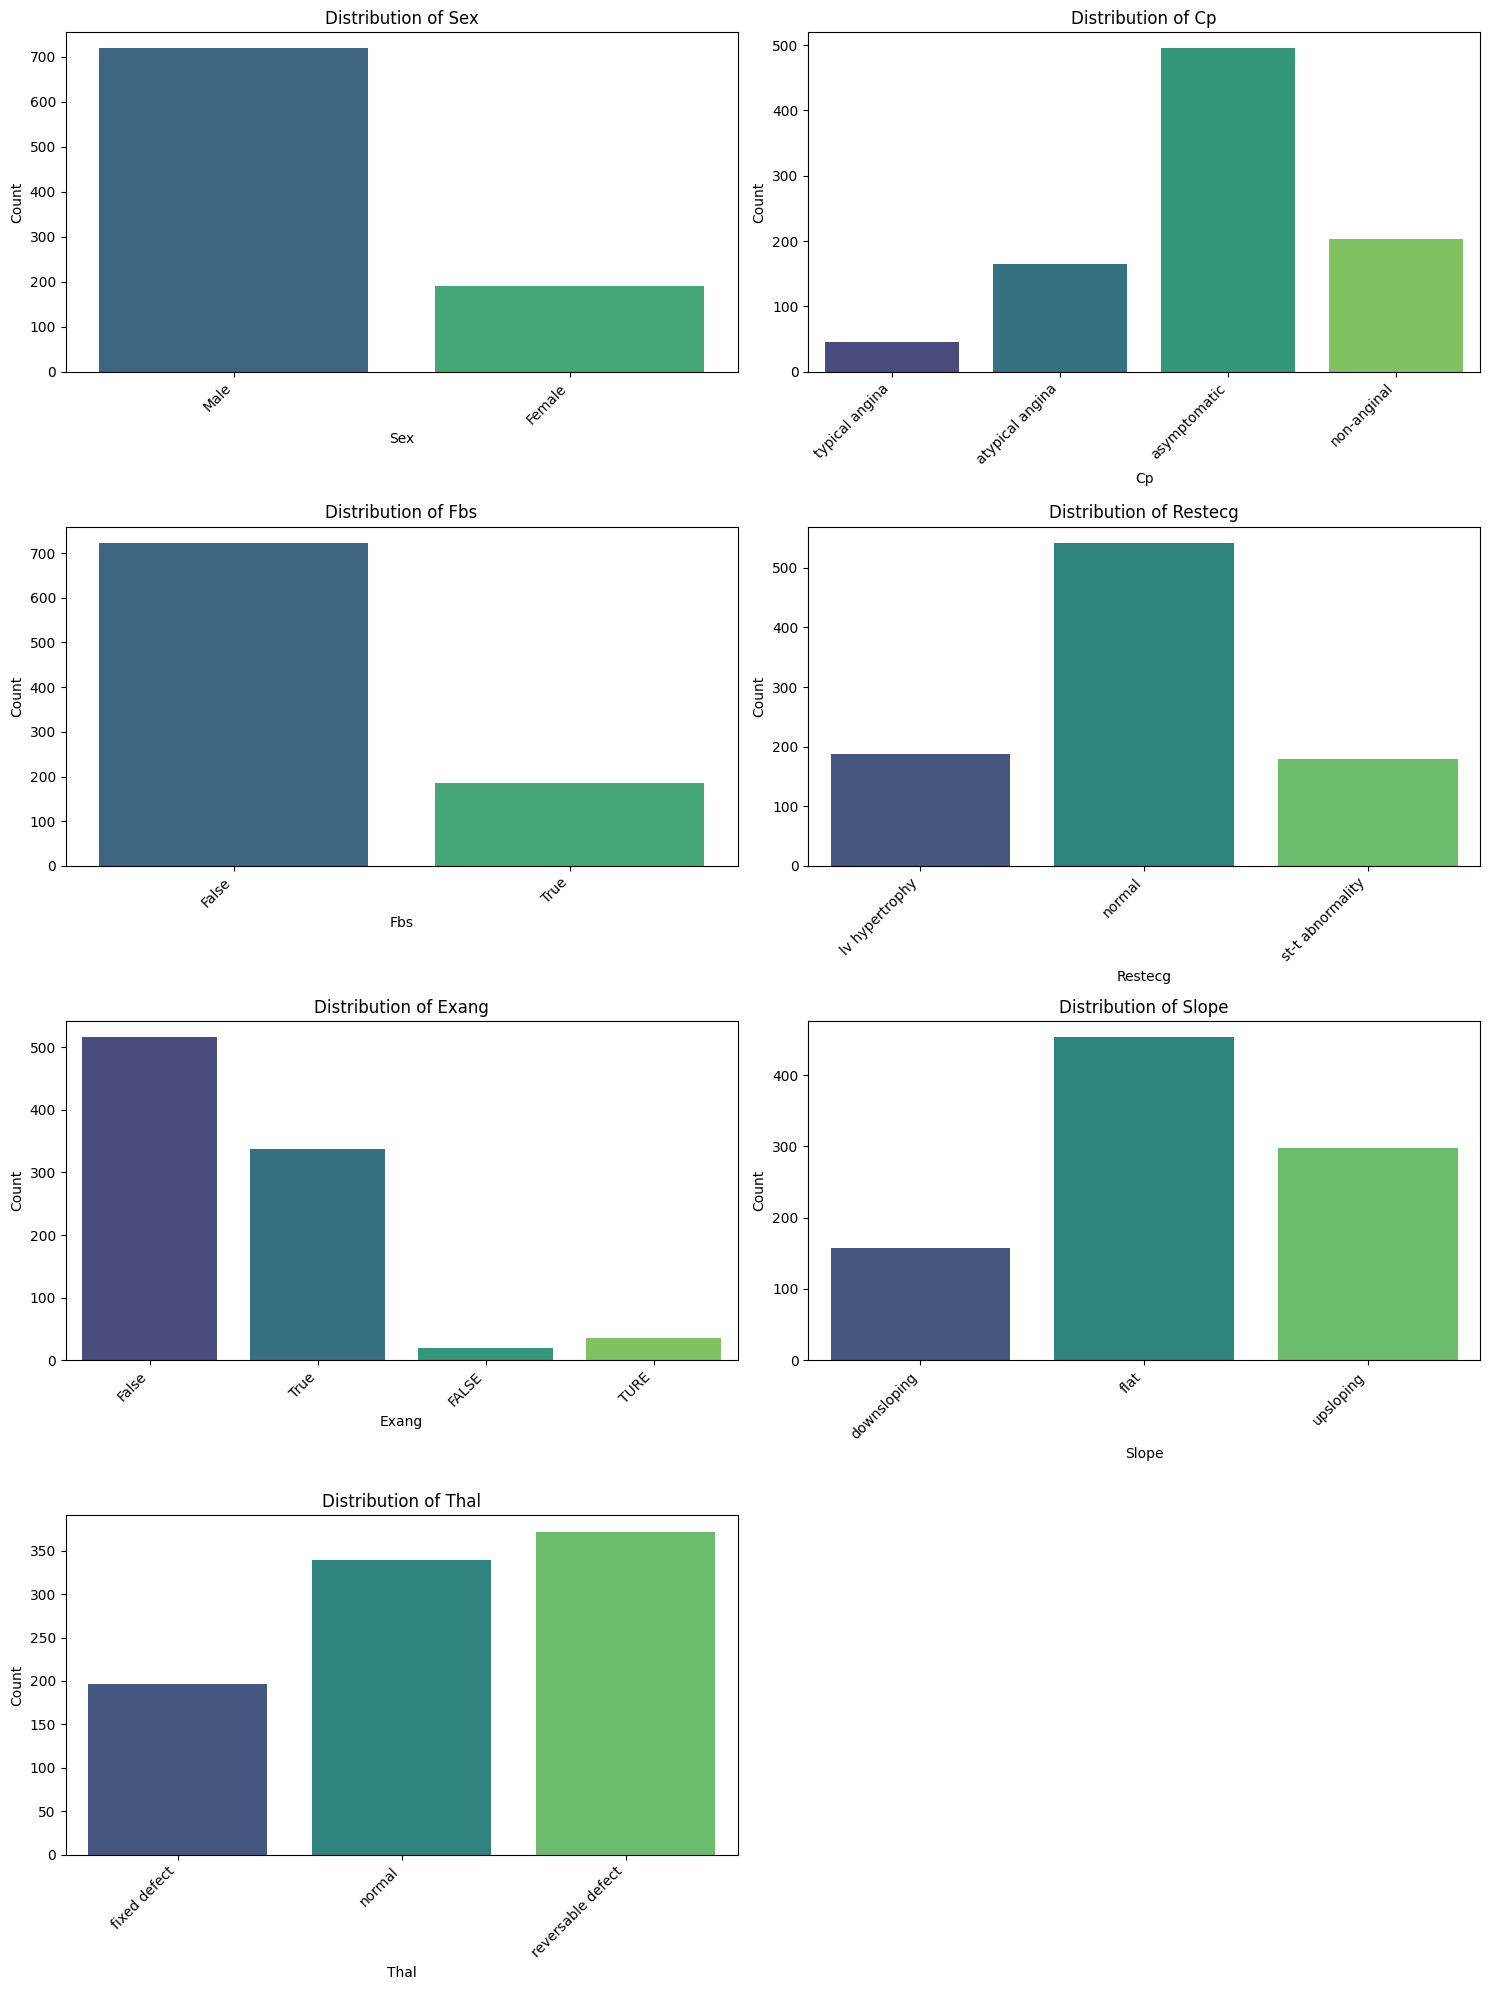

Bar plots generated successfully.

Calculating and visualizing correlation matrix for numerical columns...


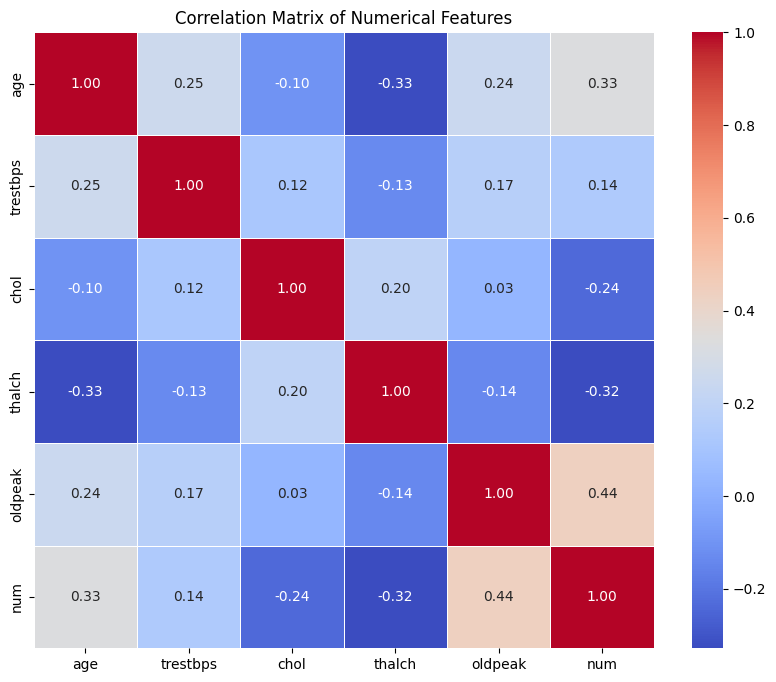

Correlation matrix visualized successfully.


In [9]:
print("Generating bar plots for categorical columns...")
plt.figure(figsize=(15, 20))
for i, col in enumerate(categorical_columns):
    plt.subplot(4, 2, i + 1) # Arrange plots in 4 rows, 2 columns
    sns.countplot(data=df, x=col, hue=col, palette='viridis', legend=False)
    plt.title(f'Distribution of {col.replace("_", " ").title()}')
    plt.xlabel(col.replace("_", " ").title())
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()
print("Bar plots generated successfully.")

print("\nCalculating and visualizing correlation matrix for numerical columns...")
correlation_matrix = df[numerical_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()
print("Correlation matrix visualized successfully.")


The first feature engineering step is to standardize the inconsistent string values in the 'exang' column as per the instructions. I will replace 'TURE' with 'True' and 'FALSE' with 'False' to ensure consistency.



In [10]:
df['exang'] = df['exang'].replace({'TURE': True, 'FALSE': False})

print("Value counts for 'exang' after standardization:")
print(df['exang'].value_counts())

Value counts for 'exang' after standardization:
exang
False    535
True     373
Name: count, dtype: int64


/tmp/ipython-input-970/136371610.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['exang'] = df['exang'].replace({'TURE': True, 'FALSE': False})



Following the instructions, I will replace the implausible '0' values in the 'trestbps' and 'chol' columns with `NaN` to correctly identify them as missing data points.



In [11]:
import numpy as np

# Replace 0 values in 'trestbps' and 'chol' with NaN
df['trestbps'] = df['trestbps'].replace(0, np.nan)
df['chol'] = df['chol'].replace(0, np.nan)

print("Number of NaN values after replacing 0s in 'trestbps' and 'chol':")
print(df[['trestbps', 'chol']].isnull().sum())

Number of NaN values after replacing 0s in 'trestbps' and 'chol':
trestbps      1
chol        172
dtype: int64



Following the instructions, I will impute the missing values in 'oldpeak', 'trestbps', and 'chol' columns using the median of their respective columns to handle the identified missing data.



In [12]:
for col in ['oldpeak', 'trestbps', 'chol']:
    median_val = df[col].median()
    df[col] = df[col].fillna(median_val)
    print(f"Missing values in '{col}' after imputation: {df[col].isnull().sum()}")

print("\nTotal missing values after imputation:")
print(df.isnull().sum())

Missing values in 'oldpeak' after imputation: 0
Missing values in 'trestbps' after imputation: 0
Missing values in 'chol' after imputation: 0

Total missing values after imputation:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64



Following the instructions, I will identify the specified categorical columns and apply one-hot encoding to them to convert them into a numerical format suitable for machine learning models. The original categorical columns will then be dropped.



In [13]:
categorical_cols_to_encode = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
df_encoded = pd.get_dummies(df, columns=categorical_cols_to_encode, drop_first=False)

print("First 5 rows of the DataFrame after One-Hot Encoding:")
print(df_encoded.head())

print("\nDataFrame Info after One-Hot Encoding:")
df_encoded.info()

First 5 rows of the DataFrame after One-Hot Encoding:
   age  trestbps   chol  thalch  oldpeak  num  sex_Female  sex_Male  \
0   63     145.0  233.0     150      2.3    0       False      True   
1   41     135.0  203.0     132      0.0    0       False      True   
2   57     140.0  192.0     148      0.4    0       False      True   
3   52     118.0  186.0     190      0.0    0       False      True   
4   57     110.0  201.0     126      1.5    0       False      True   

   cp_asymptomatic  cp_atypical angina  ...  restecg_normal  \
0            False               False  ...           False   
1            False                True  ...            True   
2             True               False  ...            True   
3            False               False  ...           False   
4             True               False  ...            True   

   restecg_st-t abnormality  exang_False  exang_True  slope_downsloping  \
0                     False         True       False             


As per the instructions, I will separate the features (X) from the target variable (y). The 'num' column will be designated as the target variable, and the remaining columns in the encoded DataFrame will become the features. After separation, I will display the first few rows of the feature DataFrame (X) and its information to confirm the split.



In [14]:
X = df_encoded.drop('num', axis=1)
y = df_encoded['num']

print("First 5 rows of the feature DataFrame (X):")
print(X.head())

print("\nInformation of the feature DataFrame (X):")
X.info()


First 5 rows of the feature DataFrame (X):
   age  trestbps   chol  thalch  oldpeak  sex_Female  sex_Male  \
0   63     145.0  233.0     150      2.3       False      True   
1   41     135.0  203.0     132      0.0       False      True   
2   57     140.0  192.0     148      0.4       False      True   
3   52     118.0  186.0     190      0.0       False      True   
4   57     110.0  201.0     126      1.5       False      True   

   cp_asymptomatic  cp_atypical angina  cp_non-anginal  ...  restecg_normal  \
0            False               False           False  ...           False   
1            False                True           False  ...            True   
2             True               False           False  ...            True   
3            False               False           False  ...           False   
4             True               False           False  ...            True   

   restecg_st-t abnormality  exang_False  exang_True  slope_downsloping  \
0         


To begin the model training phase, I will import the necessary libraries, split the dataset into training and testing sets, instantiate and train a Decision Tree Classifier, make predictions, and then calculate and display various evaluation metrics as instructed.



In [15]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

# Instantiate a Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
dt_classifier.fit(X_train, y_train)

print("\nDecision Tree Classifier trained successfully.")

# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

# For ROC-AUC, if the target is multi-class, we need to handle it properly.
# If 'num' is a binary target, roc_auc_score can be calculated directly.
# Assuming 'num' can be multi-class, let's use a try-except block or check unique values.
# Given 'num' ranges from 0 to 4, it's multi-class, so we need to use 'ovr' or 'ovo' for multi-class ROC-AUC.
# Also need prediction probabilities.

# Get prediction probabilities for ROC-AUC
y_pred_proba = dt_classifier.predict_proba(X_test)

# Calculate ROC-AUC for multi-class
# 'num' has values from 0 to 4, making it a multi-class problem. We'll use 'ovr' for one-vs-rest.
roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr', average='weighted')

print("\nInitial Model Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")

X_train shape: (726, 24)
X_test shape: (182, 24)
y_train shape: (726,)
y_test shape: (182,)

Decision Tree Classifier trained successfully.

Initial Model Evaluation Metrics:
Accuracy: 0.5055
Precision: 0.5002
Recall: 0.5055
F1-Score: 0.5022
ROC-AUC: 0.6410



To perform hyperparameter tuning, I will import necessary libraries, define a parameter grid for the Decision Tree Classifier, instantiate `GridSearchCV`, fit it to the training data, and then print the best parameters and best score as instructed.



In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Instantiate a Decision Tree Classifier
dt_classifier_grid = DecisionTreeClassifier(random_state=42)

# Instantiate GridSearchCV
grid_search = GridSearchCV(
    estimator=dt_classifier_grid,
    param_grid=param_grid,
    cv=5, # 5-fold cross-validation
    scoring='accuracy',
    verbose=1, # Print progress
    n_jobs=-1 # Use all available cores
)

# Fit GridSearchCV to the training data
print("Starting GridSearchCV for hyperparameter tuning...")
grid_search.fit(X_train, y_train)

print("GridSearchCV completed.")

# Print the best parameters found
print("\nBest parameters found:", grid_search.best_params_)

# Print the best score achieved by the best model
print("Best cross-validation score:", grid_search.best_score_)

Starting GridSearchCV for hyperparameter tuning...
Fitting 5 folds for each of 72 candidates, totalling 360 fits
GridSearchCV completed.

Best parameters found: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5}
Best cross-validation score: 0.49729806329711856



I will retrieve the best estimator from the `grid_search` object, make predictions on the test set, and then calculate and display the evaluation metrics (accuracy, precision, recall, F1-score, and ROC-AUC) for this optimized model as instructed.



In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Retrieve the best estimator from GridSearchCV
best_model = grid_search.best_estimator_

print("Optimized Decision Tree Classifier retrieved successfully.")

# Make predictions on the test set using the best model
y_pred_optimized = best_model.predict(X_test)

# Calculate evaluation metrics for the optimized model
accuracy_optimized = accuracy_score(y_test, y_pred_optimized)
precision_optimized = precision_score(y_test, y_pred_optimized, average='weighted', zero_division=0)
recall_optimized = recall_score(y_test, y_pred_optimized, average='weighted', zero_division=0)
f1_optimized = f1_score(y_test, y_pred_optimized, average='weighted', zero_division=0)

# Get prediction probabilities for ROC-AUC for the optimized model
y_pred_proba_optimized = best_model.predict_proba(X_test)

# Calculate ROC-AUC for multi-class using 'ovr'
roc_auc_optimized = roc_auc_score(y_test, y_pred_proba_optimized, multi_class='ovr', average='weighted')

print("\nOptimized Model Evaluation Metrics:")
print(f"Accuracy: {accuracy_optimized:.4f}")
print(f"Precision: {precision_optimized:.4f}")
print(f"Recall: {recall_optimized:.4f}")
print(f"F1-Score: {f1_optimized:.4f}")
print(f"ROC-AUC: {roc_auc_optimized:.4f}")

Optimized Decision Tree Classifier retrieved successfully.

Optimized Model Evaluation Metrics:
Accuracy: 0.5165
Precision: 0.4885
Recall: 0.5165
F1-Score: 0.4973
ROC-AUC: 0.6759



Following the instructions, I will now visualize the structure of the optimized decision tree model using `plot_tree` from `sklearn.tree`.



Visualizing the Decision Tree structure...


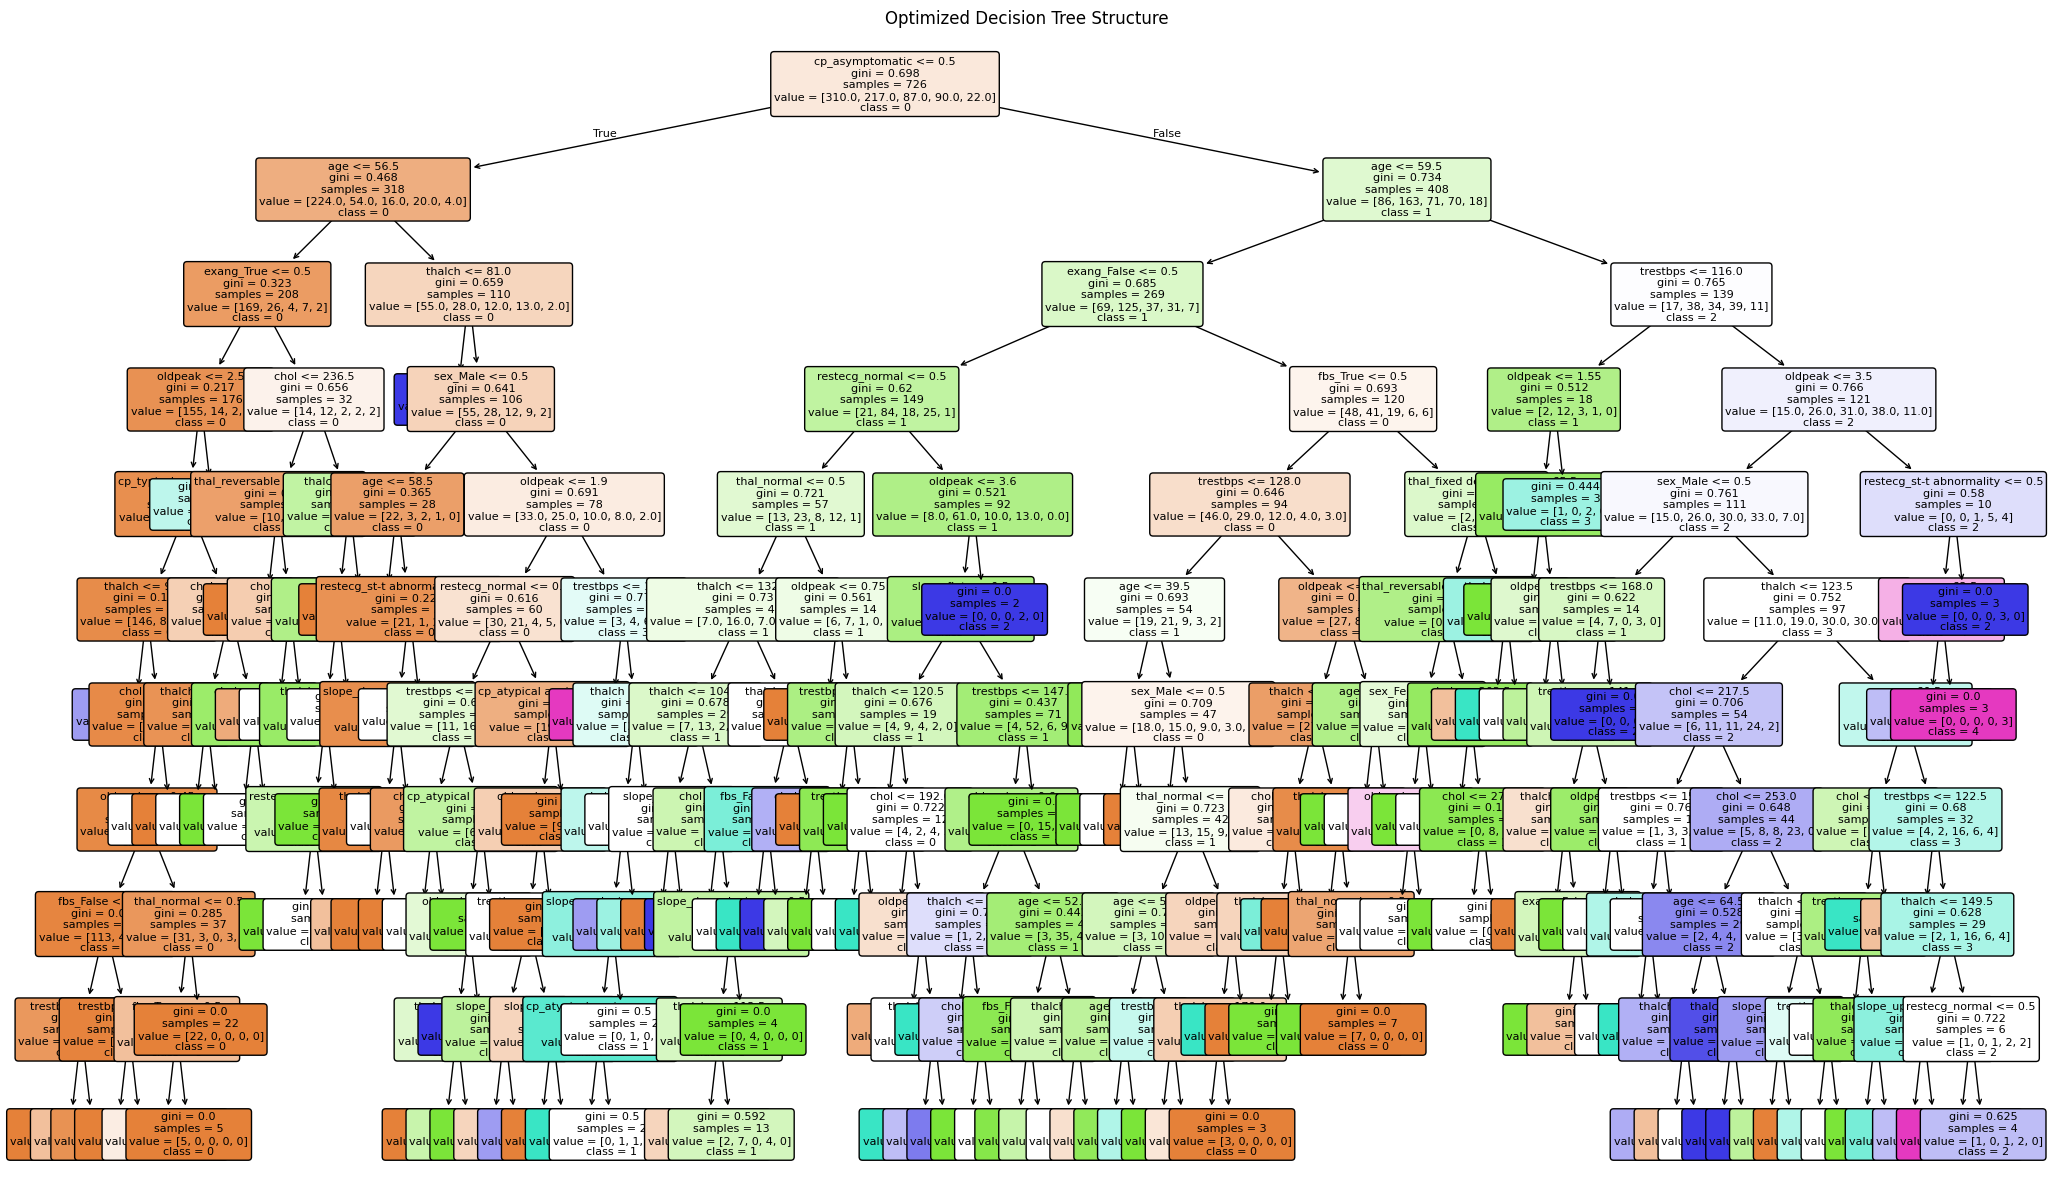

Decision Tree structure visualized successfully.


In [18]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

print("Visualizing the Decision Tree structure...")

plt.figure(figsize=(25, 15))
plot_tree(best_model,
          feature_names=X_train.columns.tolist(),
          class_names=[str(c) for c in y_train.unique()], # Convert class names to strings
          filled=True,
          rounded=True,
          fontsize=8)
plt.title('Optimized Decision Tree Structure')
plt.show()

print("Decision Tree structure visualized successfully.")


As per the instructions, I will extract the feature importances from the optimized Decision Tree model, sort them, and then visualize the top 10 most important features using a horizontal bar plot to highlight their relative contributions.



Top 10 Feature Importances:
cp_asymptomatic    0.170447
thalch             0.160319
age                0.115883
trestbps           0.104737
oldpeak            0.102469
chol               0.089187
restecg_normal     0.031582
exang_False        0.029231
sex_Male           0.028205
thal_normal        0.027157
dtype: float64


/tmp/ipython-input-970/349235368.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances_sorted.head(10), y=feature_importances_sorted.head(10).index, palette='viridis')


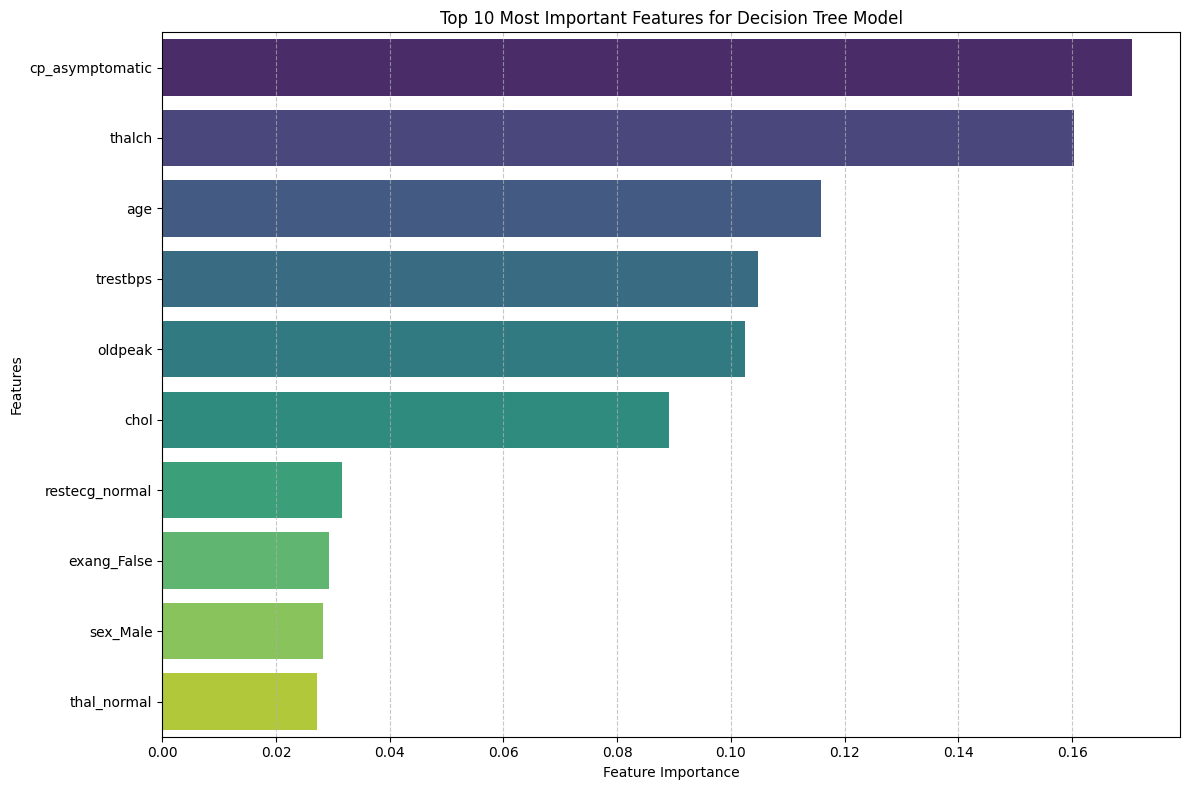

Feature importances visualized successfully.


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Extract feature importances from the best model
feature_importances = pd.Series(best_model.feature_importances_, index=X_train.columns)

# Sort feature importances in descending order
feature_importances_sorted = feature_importances.sort_values(ascending=False)

print("Top 10 Feature Importances:")
print(feature_importances_sorted.head(10))

# Visualize the top 10 most important features
plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importances_sorted.head(10), y=feature_importances_sorted.head(10).index, palette='viridis')
plt.title('Top 10 Most Important Features for Decision Tree Model')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("Feature importances visualized successfully.")


The previous code generated a `FutureWarning` regarding the usage of `palette` in `sns.barplot`. To resolve this, I will explicitly set `hue=feature_importances_sorted.head(10).index` and `legend=False` in the `sns.barplot` function, as suggested by the warning.



Top 10 Feature Importances:
cp_asymptomatic    0.170447
thalch             0.160319
age                0.115883
trestbps           0.104737
oldpeak            0.102469
chol               0.089187
restecg_normal     0.031582
exang_False        0.029231
sex_Male           0.028205
thal_normal        0.027157
dtype: float64


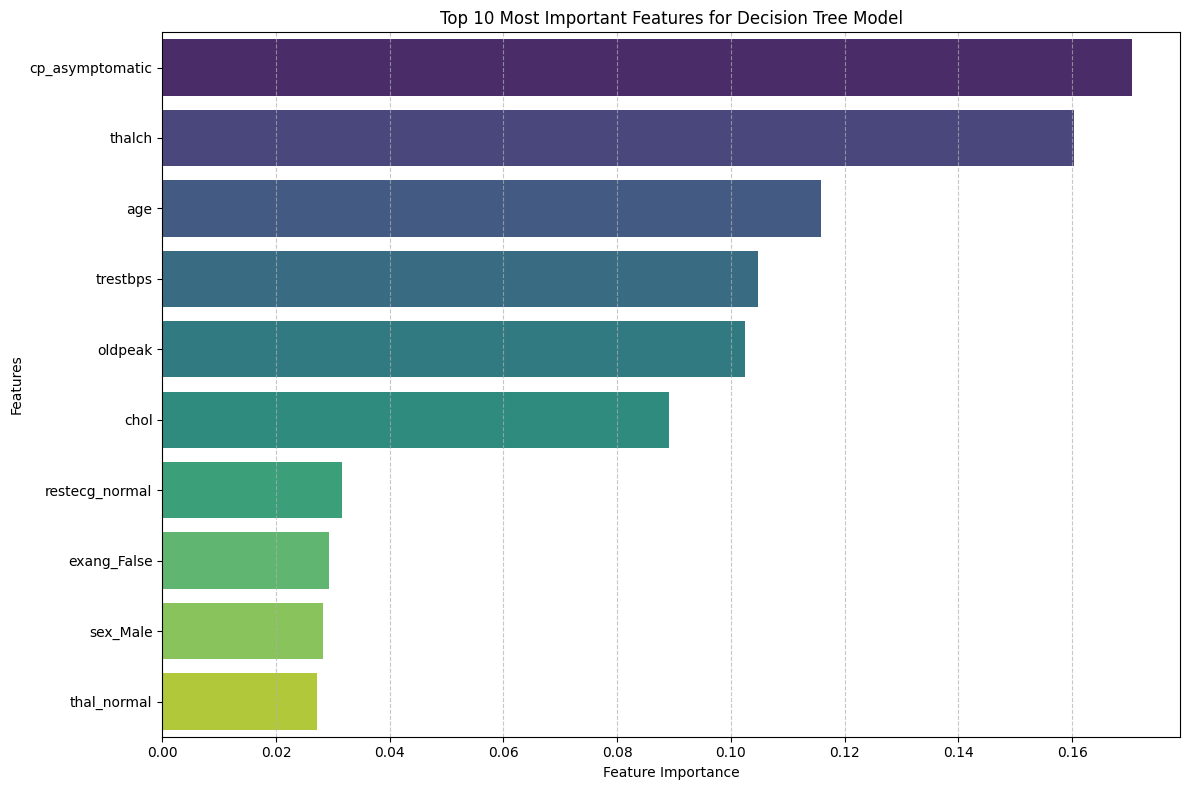

Feature importances visualized successfully.


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Extract feature importances from the best model
feature_importances = pd.Series(best_model.feature_importances_, index=X_train.columns)

# Sort feature importances in descending order
feature_importances_sorted = feature_importances.sort_values(ascending=False)

print("Top 10 Feature Importances:")
print(feature_importances_sorted.head(10))

# Visualize the top 10 most important features
plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importances_sorted.head(10), y=feature_importances_sorted.head(10).index, hue=feature_importances_sorted.head(10).index, palette='viridis', legend=False)
plt.title('Top 10 Most Important Features for Decision Tree Model')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("Feature importances visualized successfully.")

## Summary:

### Q&A
*   **Common Hyperparameters for Decision Tree Classification:**
    *   `criterion`: Determines the quality of a split, commonly 'gini' for Gini impurity or 'entropy' for information gain.
    *   `max_depth`: Limits the maximum depth of the tree, controlling overfitting by restricting the number of splits.
    *   `min_samples_split`: Specifies the minimum number of samples required to split an internal node, preventing splits on very small groups of data.
    *   `min_samples_leaf`: Defines the minimum number of samples required to be at a leaf node, ensuring a minimum size for each terminal node.

*   **Difference Between Label Encoding and One-Hot Encoding:**
    *   **Label Encoding:** Assigns a unique integer to each category within a feature. It is suitable for ordinal categorical data (where categories have a meaningful order, e.g., 'low', 'medium', 'high'). For nominal (unordered) categories, it can introduce an artificial sense of order, potentially misleading the model.
    *   **One-Hot Encoding:** Creates new binary (0 or 1) features for each unique category in the original feature. Each new feature indicates the presence (1) or absence (0) of a specific category. This method is suitable for nominal categorical data as it avoids imposing any ordinal relationship between categories.

### Data Analysis Key Findings
*   The dataset, loaded from the 'Heart\_disease' sheet, contained 908 entries and 13 columns, with the target variable `num` representing multi-class heart disease presence (0 to 4).
*   Exploratory Data Analysis revealed 62 missing values in the `oldpeak` column. Additionally, unrealistic '0' values were found in `chol` (172 instances) and `trestbps` (1 instance), which were subsequently treated as missing.
*   Significant data imbalance was observed in the `sex` column (718 Male, 190 Female), and inconsistent string values in the `exang` column ('True', 'False', 'TURE', 'FALSE') were identified and corrected.
*   After feature engineering, all missing values were imputed using the median, and categorical features were successfully One-Hot Encoded, expanding the feature set to 24 columns.
*   The initial Decision Tree model, trained with default parameters, achieved an Accuracy of approximately 0.5055 and a weighted ROC-AUC of 0.6410 on the test set.
*   Hyperparameter tuning using GridSearchCV identified the optimal parameters for the Decision Tree as `criterion='gini'`, `max_depth=10`, `min_samples_leaf=2`, and `min_samples_split=5`. This yielded a best cross-validation accuracy of approximately 0.4973.
*   The optimized Decision Tree model showed a slight improvement in performance on the test set, achieving an Accuracy of approximately 0.5165, a weighted Precision of 0.4885, Recall of 0.5165, F1-Score of 0.4973, and a weighted ROC-AUC of 0.6759.
*   Feature importance analysis highlighted `cp_asymptomatic` (0.1704), `thalch` (0.1603), and `age` (0.1158) as the top three most influential features in the optimized Decision Tree model for predicting heart disease.

### Insights or Next Steps
*   The optimized Decision Tree model's performance, with an accuracy of around 51.65% and a weighted ROC-AUC of 67.59% for a multi-class problem, suggests that predicting heart disease accurately with this dataset remains challenging. Further investigation into more advanced models or feature engineering is warranted.
*   Given the observed class imbalance in features like `sex` and the multi-class nature of the target variable, explore techniques such as stratified sampling for model training and evaluation, or consider using oversampling/undersampling methods (e.g., SMOTE) to potentially improve model performance.
